In [3]:
import json
from collections import Counter
import matplotlib.pyplot as plt 
from sklearn.manifold import TSNE
import plotly.express as px
import numpy as np
import pandas as pd
from sentence_transformers import SentenceTransformer

c:\Users\faceru\AppData\Local\Programs\Python\Python312\Lib\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [4]:
with open('data/chunked_data/gdpr_clean.json') as f: 
    gdpr_clean = json.load(f)

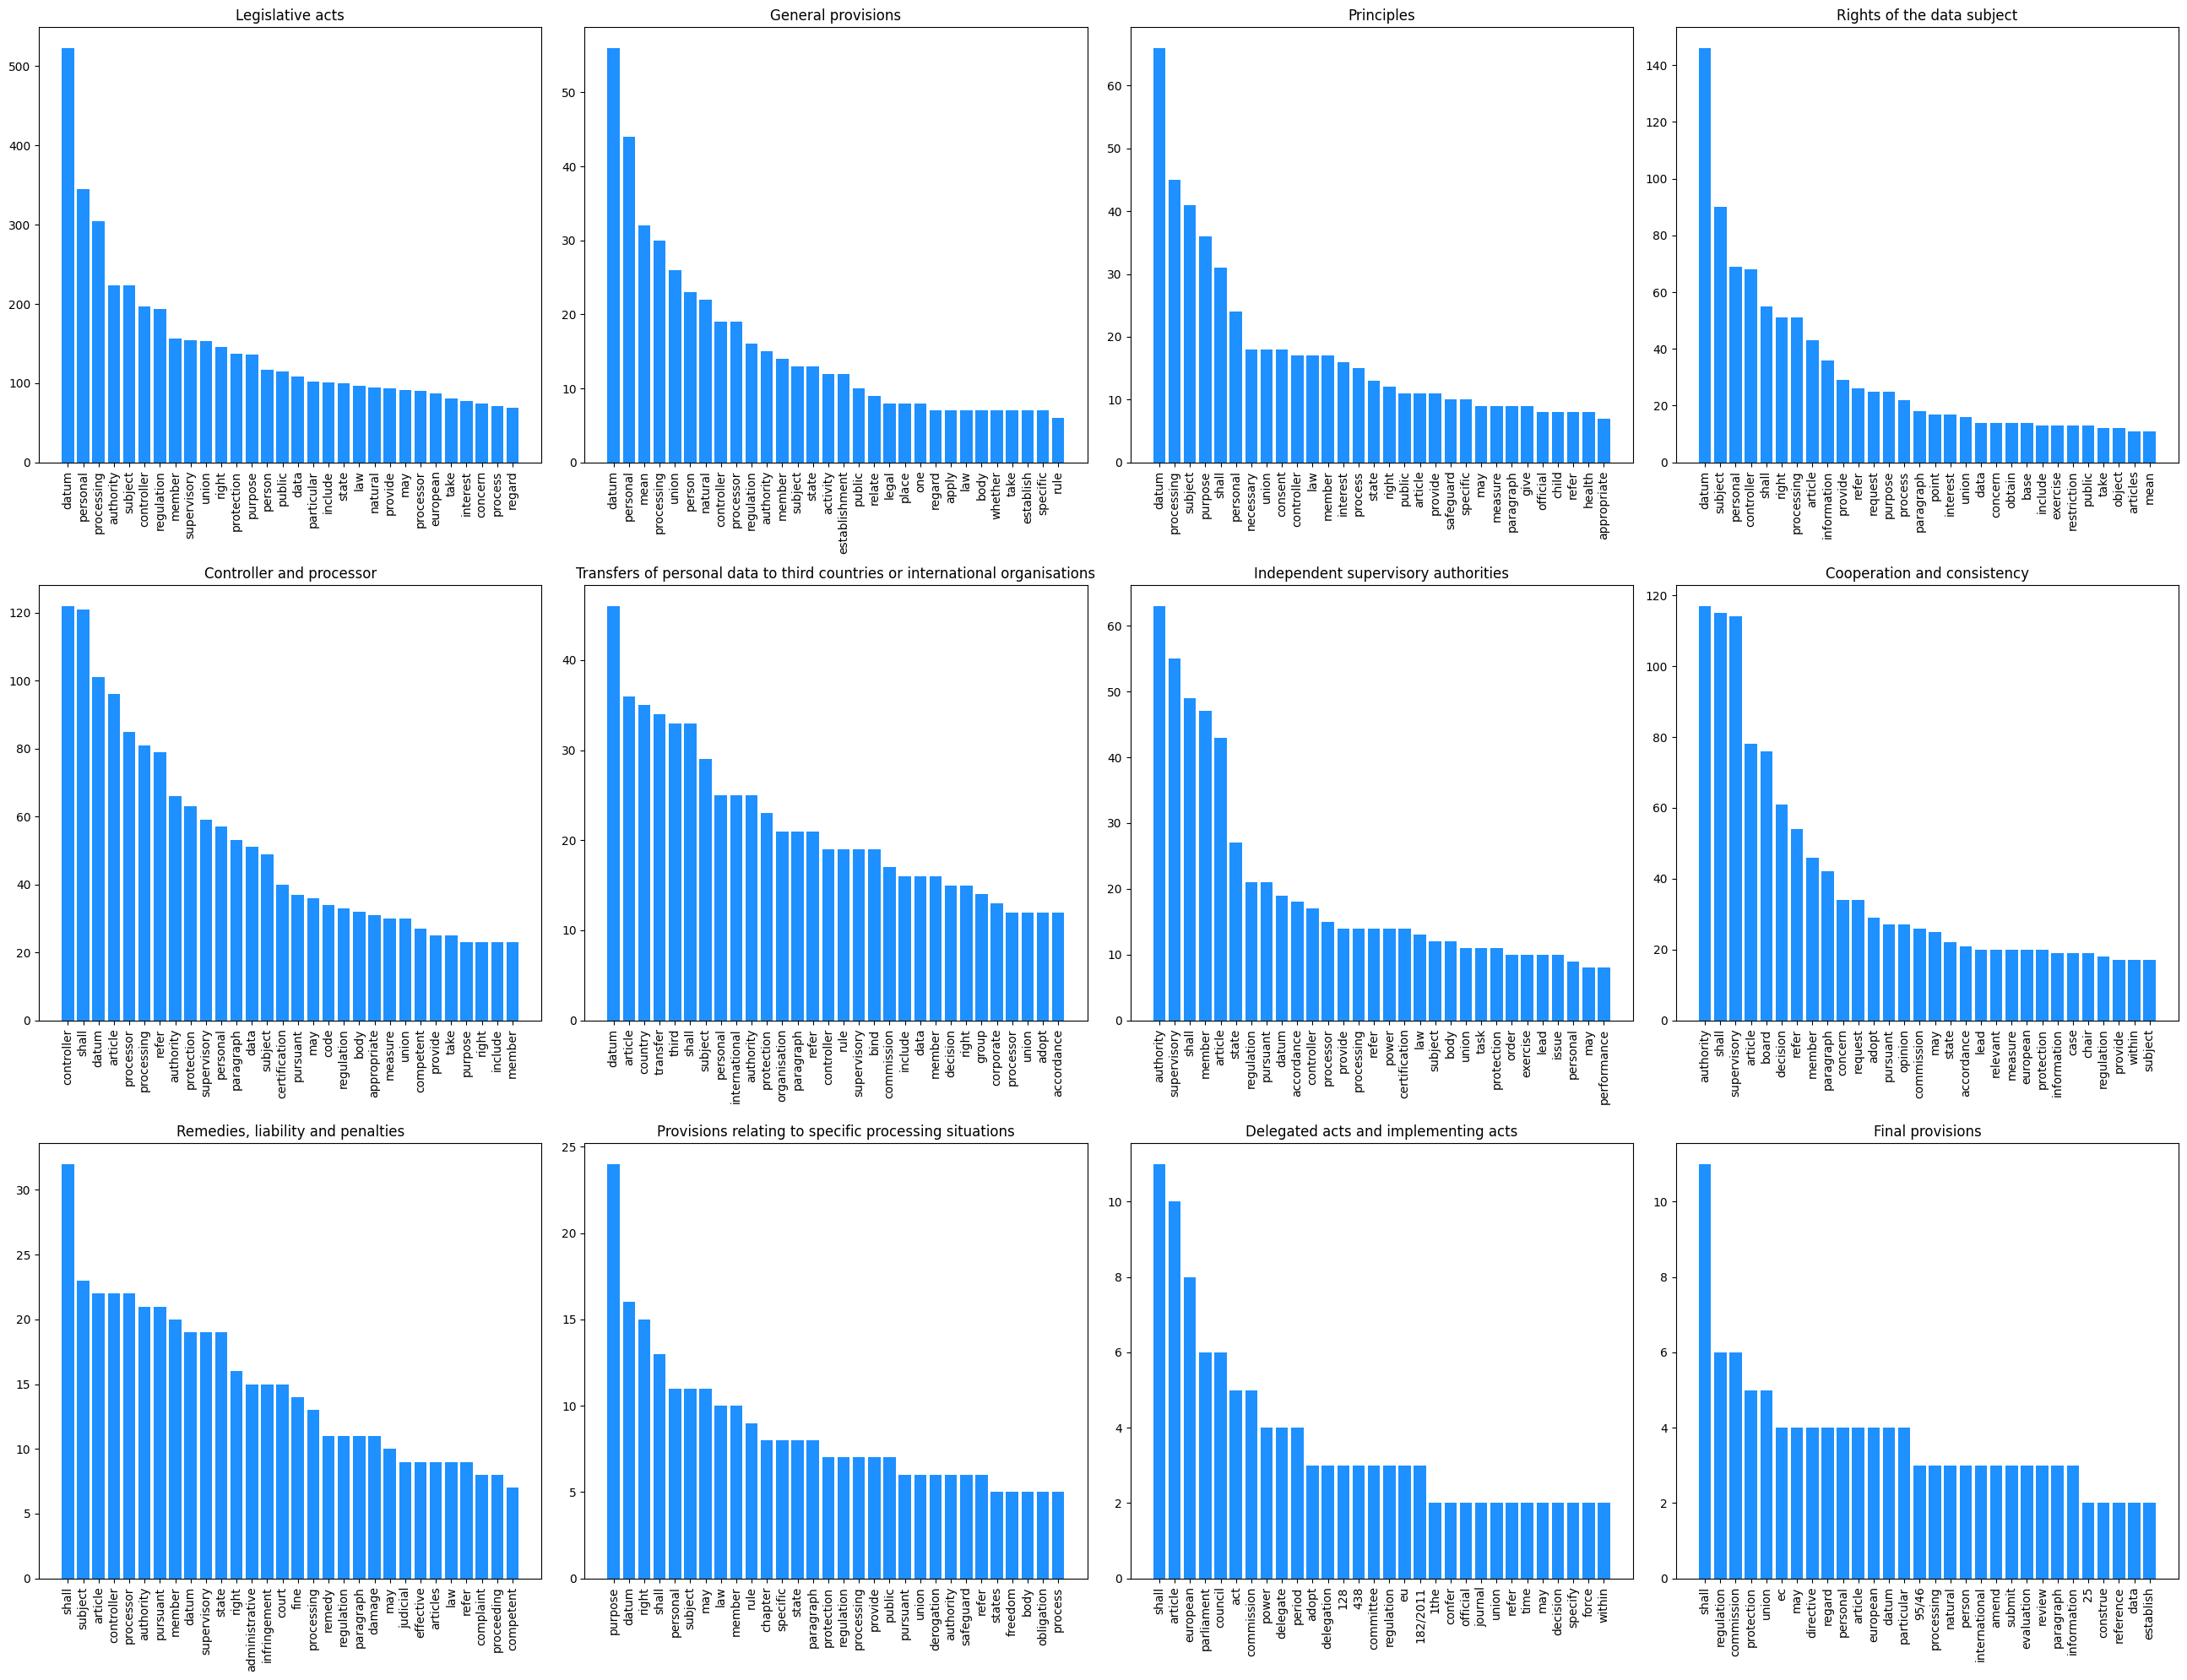

In [8]:
fig, axs = plt.subplots(ncols=4, nrows=3, figsize=(26,20))
axs=axs.ravel()
chapters = list(gdpr_clean.keys())
for i in range(len(axs)):
    ax = axs[i]
    chapter = chapters[i]
    top_20_words = Counter(' '.join(gdpr_clean[chapter].values()).split()).most_common(30)
    x_labs = [x for x,y in top_20_words]
    y_vals = [y for x,y in top_20_words]
    ax.bar(x=x_labs, height=y_vals, color='dodgerblue')
    ax.set_title(f'{chapter}')
    ax.tick_params(axis='x', labelrotation=90)

plt.tight_layout()    
plt.show()

In [9]:
model = SentenceTransformer('intfloat/multilingual-e5-large-instruct') 
embeddings = []
chapter = []
article = []
for k in tqdm(gdpr_clean.keys()):
    for sub_k in gdpr_clean[k].keys():
        embeddings.append(model.encode(gdpr_clean[k][sub_k], normalize_embeddings=True))
        chapter.append(k)
        article.append(sub_k)
embeddings = np.array(embeddings)

100%|██████████| 12/12 [00:57<00:00,  4.80s/it]


In [22]:
embedded = TSNE(n_components=2, learning_rate='auto', init='random', random_state=42).fit_transform(embeddings)
embedded_df = pd.DataFrame({'x': embedded[:,0], 'y':embedded[:,1], 'chapter':chapter, 'article':article})
px.scatter(embedded_df, 'x', 'y', color='chapter', color_discrete_sequence=px.colors.qualitative.Dark24)

In [ ]:
from bertopic import BERTopic 
topic_model = BERTopic()
topics, probs = topic_model.fit_transform(docs)